
Dataset preview:


,room_type,season,occupancy_rate,length_of_stay,historical_price,bedrooms,bathrooms,beds,balcony,garden,sqft_room,room_type_enc,season_enc,price
0,Standard,Low,40.936455,3,77,1,1,1,0,1,42,0,0,226.15
1,Suite,Mid,39.758304,9,250,1,2,1,0,0,65,2,1,426.72
2,Deluxe,High,92.500366,5,366,1,1,2,0,0,47,1,2,315.86
3,Deluxe,High,39.963696,8,288,3,1,2,1,0,45,1,2,376.25
4,Standard,High,41.755978,7,266,1,1,1,0,1,29,0,2,252.46



COMPLETE MODEL ANALYSIS


,Model,R2_train,R2_test,Gap,Status
0,LinearRegression,0.9659,0.9691,-0.0032,Balanced
1,Ridge(a=1.0),0.9659,0.9690,-0.0031,Balanced
2,Lasso(a=0.1),0.9659,0.9690,-0.0031,Balanced
3,LinearRegression + Poly(deg=2),0.9684,0.9650,0.0034,Balanced
4,Ridge(a=1.0) + Poly(deg=2),0.9684,0.9649,0.0035,Balanced
5,Lasso(a=0.1) + Poly(deg=2),0.9684,0.9660,0.0024,Balanced
6,LinearRegression + Poly(deg=3),0.9781,0.9429,0.0351,Balanced
7,Ridge(a=1.0) + Poly(deg=3),0.9780,0.9430,0.0351,Balanced
8,Lasso(a=0.1) + Poly(deg=3),0.9773,0.9547,0.0225,Balanced
9,RandomForest,0.9888,0.9326,0.0562,Balanced



EXCLUDED MODELS (Overfitting / Underfitting)


,Model,Status



RELIABLE MODELS (Balanced)


,Model,R2_train,R2_test,RMSE,CV_R2_mean
0,LinearRegression,0.9659,0.9691,19.4320,0.9650
2,Lasso(a=0.1),0.9659,0.9690,19.4481,0.9650
1,Ridge(a=1.0),0.9659,0.9690,19.4504,0.9650
5,Lasso(a=0.1) + Poly(deg=2),0.9684,0.9660,20.3879,0.9623
3,LinearRegression + Poly(deg=2),0.9684,0.9650,20.6797,0.9615
4,Ridge(a=1.0) + Poly(deg=2),0.9684,0.9649,20.6915,0.9615
8,Lasso(a=0.1) + Poly(deg=3),0.9773,0.9547,23.5095,0.9434
11,GradientBoosting,0.9963,0.9478,25.2573,0.9436
7,Ridge(a=1.0) + Poly(deg=3),0.9780,0.9430,26.3889,0.9187
6,LinearRegression + Poly(deg=3),0.9781,0.9429,26.4049,0.9174



 BEST MODEL SELECTED: LinearRegression
   R2 Test: 0.9691
   RMSE: 19.43

FEATURE IMPORTANCE ANALYSIS

 Top 10 most influential variables for pricing:


,Feature,Importance
8,sqft_room,92.4085
9,room_type_enc,36.1582
10,season_enc,20.8450
3,bedrooms,20.4079
4,bathrooms,13.9215
0,occupancy_rate,11.3641
5,beds,1.6645
2,historical_price,1.3049
1,length_of_stay,0.8397
7,garden,0.7932


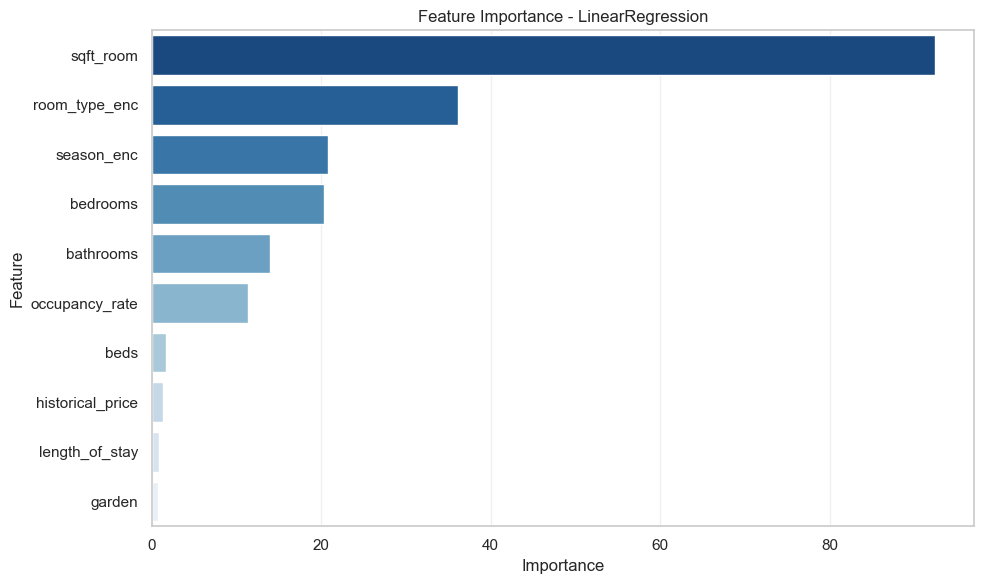

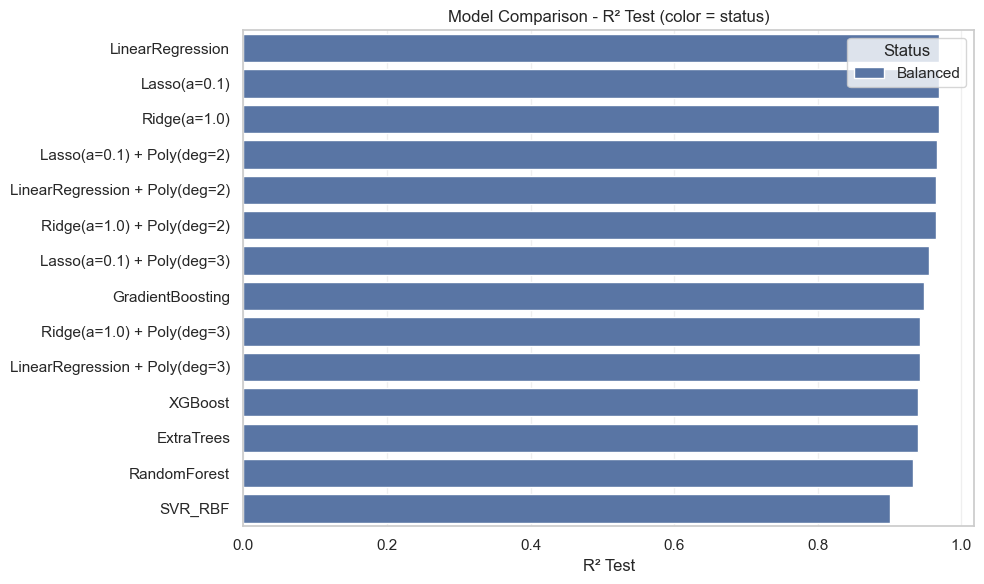

In [1]:
# -----------------------------
# STEP 0 - ENVIRONMENT SETUP
# -----------------------------
import warnings
warnings.filterwarnings('ignore')  # Silence warnings, they just clutter the lab

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

np.random.seed(42)  # Because chaos is fun, but reproducibility is sacred
sns.set(style="whitegrid")

# ============================================================
# STEP 1 - GENERATE A REALISTIC SYNTHETIC DATASET
# ============================================================
n = 1000
room_types = ['Standard', 'Deluxe', 'Suite']
seasons = ['Low', 'Mid', 'High']

df = pd.DataFrame({
    'room_type': np.random.choice(room_types, n, p=[0.5, 0.35, 0.15]),
    'season': np.random.choice(seasons, n, p=[0.4, 0.3, 0.3]),
    'occupancy_rate': np.random.uniform(20, 100, n),
    'length_of_stay': np.random.randint(1, 15, n),
    'historical_price': np.random.randint(40, 480, n),
    'bedrooms': np.random.choice([1, 2, 3], n, p=[0.6, 0.25, 0.15]),
    'bathrooms': np.random.choice([1, 2, 3], n, p=[0.7, 0.2, 0.1]),
    'beds': np.random.randint(1, 5, n),
    'balcony': np.random.choice([0, 1], n, p=[0.6, 0.4]),
    'garden': np.random.choice([0, 1], n, p=[0.8, 0.2]),
    'sqft_room': np.random.randint(20, 150, n)
})

# Encode categorical variables numerically
df['room_type_enc'] = df['room_type'].map({'Standard': 0, 'Deluxe': 1, 'Suite': 2})
df['season_enc'] = df['season'].map({'Low': 0, 'Mid': 1, 'High': 2})

# Create target price with a bit of noise to simulate reality
df['price'] = (
    50 + 
    df['sqft_room'] * 2.5 + 
    df['bedrooms'] * 30 + 
    df['bathrooms'] * 20 + 
    df['room_type_enc'] * 50 + 
    df['season_enc'] * 25 + 
    df['occupancy_rate'] * 0.5 +
    np.random.normal(0, 20, n)
).round(2)
df['price'] = df['price'].clip(lower=50)  # Minimum price sanity check

# Quick peek at our synthetic playground
print("\nDataset preview:")
display(df.head())

# ============================================================
# STEP 2 - FEATURE SELECTION
# ============================================================
# Define features for the model — the variables our model will "listen to"
features = [
    'occupancy_rate', 'length_of_stay', 'historical_price', 
    'bedrooms', 'bathrooms', 'beds', 'balcony', 'garden', 
    'sqft_room', 'room_type_enc', 'season_enc'
]

X = df[features]
y = df['price']

# Split the world into training and testing — the eternal scientific experiment
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

# ============================================================
# STEP 3 - MODEL EVALUATION FUNCTION
# ============================================================
def evaluate_model(name, model, X_train, y_train, X_test, y_test, scale=False, poly=None):
    """
    Fit the model, predict, evaluate, and return key metrics.
    Scale or polynomial transform if specified. Cross-validation included.
    """
    steps = []
    if scale:
        steps.append(('scaler', StandardScaler()))
    if poly:
        steps.append(('poly', PolynomialFeatures(degree=poly, include_bias=False)))
    steps.append(('model', model))
    pipeline = Pipeline(steps)
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    r2_train = pipeline.score(X_train, y_train)
    r2_test = pipeline.score(X_test, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    cv_r2 = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2').mean()
    
    return {
        'Model': name,
        'R2_train': r2_train,
        'R2_test': r2_test,
        'Gap': r2_train - r2_test,
        'RMSE': rmse,
        'CV_R2_mean': cv_r2
    }

models = []

# -----------------------------
# Linear Models — simple, elegant, predictable
# -----------------------------
linear_models = {
    'LinearRegression': LinearRegression(),
    'Ridge(a=1.0)': Ridge(alpha=1.0),
    'Lasso(a=0.1)': Lasso(alpha=0.1, max_iter=10000)
}

for name, m in linear_models.items():
    models.append(evaluate_model(name, m, X_train, y_train, X_test, y_test, scale=True))

# Polynomial extensions — unleashing non-linear curiosity
for deg in [2, 3]:
    for name, m in linear_models.items():
        models.append(evaluate_model(f"{name} + Poly(deg={deg})", m, X_train, y_train, X_test, y_test, scale=True, poly=deg))

# -----------------------------
# Non-linear / Ensemble Models — the heavy hitters
# -----------------------------
ensemble_models = {
    "RandomForest": RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=250, max_depth=6, learning_rate=0.1, random_state=42, verbosity=0),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42),
    "ExtraTrees": ExtraTreesRegressor(n_estimators=300, max_depth=10, random_state=42),
    "SVR_RBF": SVR(kernel='rbf', C=10, epsilon=0.1)
}

# Scale only if needed (SVR requires it)
for name, model in ensemble_models.items():
    scale = True if "SVR" in name else False
    models.append(evaluate_model(name, model, X_train, y_train, X_test, y_test, scale=scale))

df_results = pd.DataFrame(models)

# ============================================================
# STEP 4 - CHECK FOR OVERFITTING / UNDERFITTING
# ============================================================
def label_model(row):
    """
    Quick heuristic to flag if a model underfits, overfits, or is balanced.
    Because even in science, some models misbehave.
    """
    if row['R2_train'] < 0.5 and row['R2_test'] < 0.5:
        return 'Underfitting'
    elif row['Gap'] > 0.1:
        return 'Overfitting'
    else:
        return 'Balanced'

df_results['Status'] = df_results.apply(label_model, axis=1)

# ============================================================
# STEP 5 - SELECT THE BEST MODEL
# ============================================================
print("\n===============================")
print("COMPLETE MODEL ANALYSIS")
print("===============================")
display(df_results[['Model', 'R2_train', 'R2_test', 'Gap', 'Status']].round(4))

excluded = df_results[df_results['Status'] != 'Balanced']
balanced = df_results[df_results['Status'] == 'Balanced'].sort_values('R2_test', ascending=False)

print("\n===============================")
print("EXCLUDED MODELS (Overfitting / Underfitting)")
print("===============================")
display(excluded[['Model', 'Status']])

print("\n===============================")
print("RELIABLE MODELS (Balanced)")
print("===============================")
display(balanced[['Model', 'R2_train', 'R2_test', 'RMSE', 'CV_R2_mean']].round(4))

if not balanced.empty:
    best_model = balanced.iloc[0]
    print(f"\n BEST MODEL SELECTED: {best_model['Model']}")
    print(f"   R2 Test: {best_model['R2_test']:.4f}")
    print(f"   RMSE: {best_model['RMSE']:.2f}")
else:
    print("\n No balanced model found. Time to tinker with parameters or dataset!")

# ============================================================
# STEP 5B - FEATURE IMPORTANCE
# ============================================================
print("\n===============================")
print("FEATURE IMPORTANCE ANALYSIS")
print("===============================")

best_model_name = best_model['Model']

def get_trained_pipeline(model_name):
    """
    Reconstruct and fit the pipeline of the chosen model.
    Because knowing your best model inside-out is part of the fun.
    """
    # Match model type to pipeline setup
    if "LinearRegression" in model_name:
        model = LinearRegression()
        scale, poly = True, None
    elif "Ridge" in model_name:
        model = Ridge(alpha=1.0)
        scale, poly = True, None
    elif "Lasso" in model_name:
        model = Lasso(alpha=0.1, max_iter=10000)
        scale, poly = True, None
    elif "RandomForest" in model_name:
        model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
        scale, poly = False, None
    elif "XGBoost" in model_name:
        model = XGBRegressor(n_estimators=250, max_depth=6, learning_rate=0.1, random_state=42, verbosity=0)
        scale, poly = False, None
    elif "GradientBoosting" in model_name:
        model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
        scale, poly = False, None
    elif "ExtraTrees" in model_name:
        model = ExtraTreesRegressor(n_estimators=300, max_depth=10, random_state=42)
        scale, poly = False, None
    elif "SVR" in model_name:
        model = SVR(kernel='rbf', C=10, epsilon=0.1)
        scale, poly = True, None
    else:
        model = LinearRegression()
        scale, poly = True, None

    steps = []
    if scale:
        steps.append(('scaler', StandardScaler()))
    if poly:
        steps.append(('poly', PolynomialFeatures(degree=poly, include_bias=False)))
    steps.append(('model', model))
    pipeline = Pipeline(steps)
    pipeline.fit(X_train, y_train)
    return pipeline

pipeline_best = get_trained_pipeline(best_model_name)
model = pipeline_best.named_steps['model']

# Determine feature importances or coefficients
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
elif hasattr(model, 'coef_'):
    coefs = model.coef_
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': np.abs(coefs)
    }).sort_values(by='Importance', ascending=False)
else:
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.nan})

print("\n Top 10 most influential variables for pricing:")
display(feature_importance.head(10).round(4))

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature', palette='Blues_r')
plt.title(f'Feature Importance - {best_model_name}')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================
# STEP 6 - MODEL COMPARISON VISUALIZATION
# ============================================================
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_results.sort_values('R2_test', ascending=False),
    x='R2_test', y='Model', hue='Status', dodge=False
)
plt.title('Model Comparison - R² Test (color = status)')
plt.xlabel('R² Test')
plt.ylabel('')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()